# Fare Play: An Unraveling of the Mystery of Flight Prices

by: Mark Dunlea Tate, Landry Houston, Anthony Amadasun

---

## 3.1 Introduction

In this notebook, we employ a Random Forest Regressor model to predict flight price.

---

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

Read and assign data set.

In [18]:
df = pd.read_csv('../data/encoded_dataset.csv')
df.head()

,flight,stops,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,airline_Air_India,airline_GO_FIRST,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,SG-8709,0,0,130,71.44,Short,2,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,SG-8157,0,0,140,71.44,Short,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,I5-764,0,0,130,71.47,Short,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,UK-995,0,0,135,71.46,Short,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,UK-963,0,0,140,71.46,Short,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


---

## 3.2 Regression Modeling

In [19]:
X = df.drop(columns=["flight", "price", "duration_range"])
y = df["price"]

In [20]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

### Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Training Score: {lr.score(X_train, y_train):.4f}")
print(f"Testing Score: {lr.score(X_test, y_test):.4f}")

lr_y_pred = lr.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, lr_y_pred))}")

Training Score: 0.9417
Testing Score: 0.9408
RMSE Score: 66.27496071729996


Interpretation:

The provided results suggest that the model performs well on both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9417 shows that the model fits the training data well and the Testing Score of 0.9408 shows that the model generalizes well to new, unseen data. The lower RMSE score of 66.27 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

### Random Forest Regressor

In [24]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Print out train and test scores as well as RMSE.

In [25]:
print(f"Training Score: {rf.score(X_train, y_train):.4f}")
print(f"Testing Score: {rf.score(X_test, y_test):.4f}")

rf_y_pred = rf.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, rf_y_pred))}")

Training Score: 0.9793
Testing Score: 0.9754
RMSE Score: 42.74837031232066


Interpretation

The provided results suggest that the Random Forest model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9793 shows that the model fits the training data well and the Testing Score of 0.9754 shows that the model generalizes well to new, unseen data. The lower RMSE score of 42.75 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

### Decision Tree Regressor

In [26]:
dt = DecisionTreeRegressor(max_depth=7, min_samples_split=2, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5)

In [27]:
print(f"Training Score: {dt.score(X_train, y_train):.4f}")
print(f"Testing Score: {dt.score(X_test, y_test):.4f}")

dt_y_pred = dt.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, dt_y_pred))}")

Training Score: 0.9443
Testing Score: 0.9428
RMSE Score: 65.15962052644102


Interpretation

The provided results suggest that the Decision Tree model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9443 shows that the model fits the training data well and the Testing Score of 0.9428 shows that the model generalizes well to new, unseen data. The lower RMSE score of 65.15 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

In [28]:
gb = XGBRegressor()
gb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [29]:
print(f"Training Score: {gb.score(X_train, y_train):.4f}")
print(f"Testing Score: {gb.score(X_test, y_test):.4f}")

gb_y_pred = gb.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, gb_y_pred))}")

Training Score: 0.9699
Testing Score: 0.9680
RMSE Score: 48.713480653172944


The provided results suggest that the Gradient Boost model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9699 shows that the model fits the training data well and the Testing Score of 0.9680 shows that the model generalizes well to new, unseen data. The lower RMSE score of 48.71 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

---

## 3.3 Model Visualization

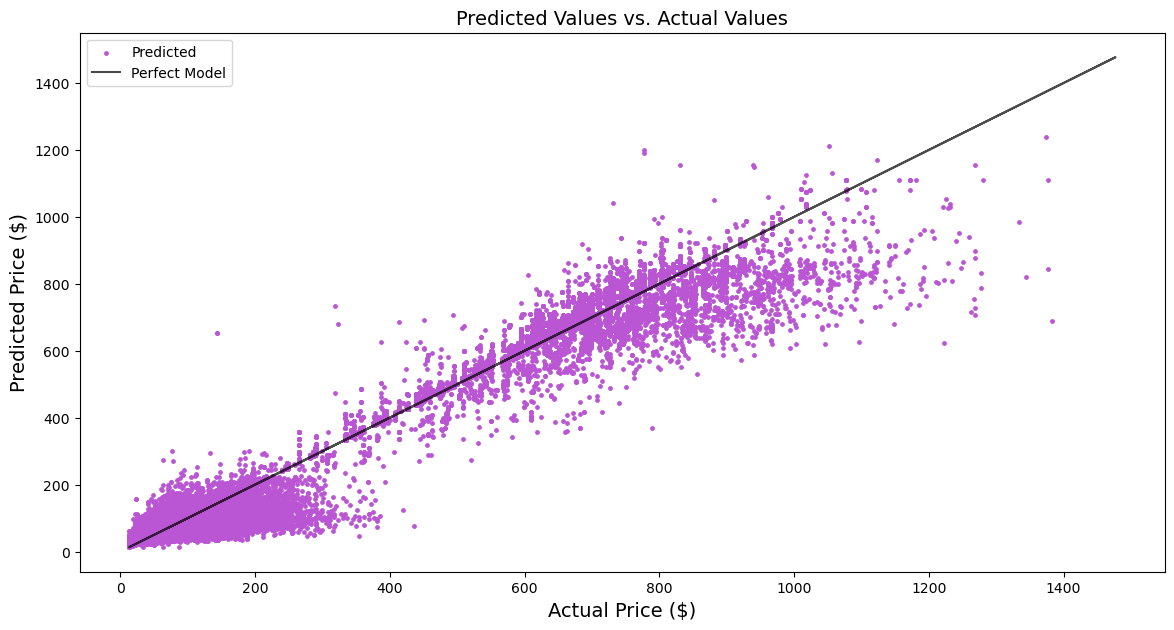

In [30]:
plt.figure(figsize=(14, 7))
plt.scatter(
    y_test,
    rf_y_pred,
    color="MediumOrchid",
    s=6,
    label="Predicted",
)
plt.title("Predicted Values vs. Actual Values", size=14)
plt.xlabel("Actual Price ($)", size=14)
plt.ylabel("Predicted Price ($)", size=14)
plt.plot(df["price"], y, color="black", alpha=0.7, label="Perfect Model")
plt.legend(loc="upper left")
plt.savefig("../images/residuals_scatterplot.png", bbox_inches="tight")

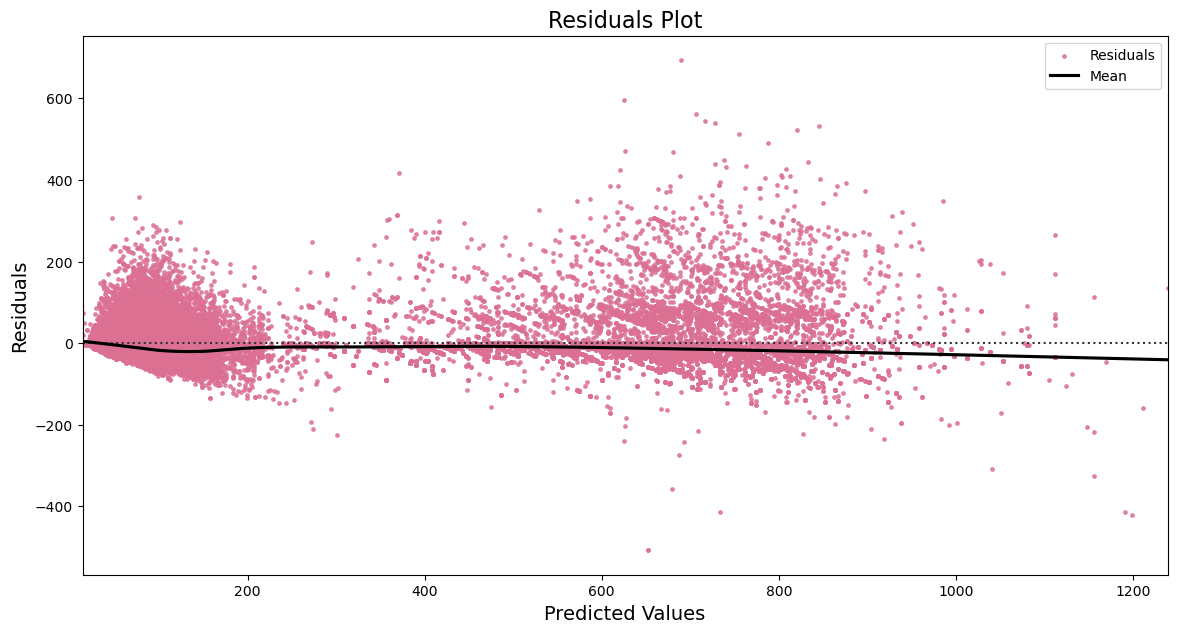

In [31]:
plt.figure(figsize=(14, 7))
sns.residplot(
    x=rf_y_pred,
    y=y_test,
    lowess=True,
    color="PaleVioletRed",
    line_kws=dict(color="black", label="Mean"),
    label="Residuals",
    scatter_kws={"s": 6},
)
plt.title("Residuals Plot", size=16)
plt.xlabel("Predicted Values", size=14)
plt.ylabel("Residuals", size=14)
plt.legend()
plt.savefig("../images/residuals_residplot.png", bbox_inches="tight")

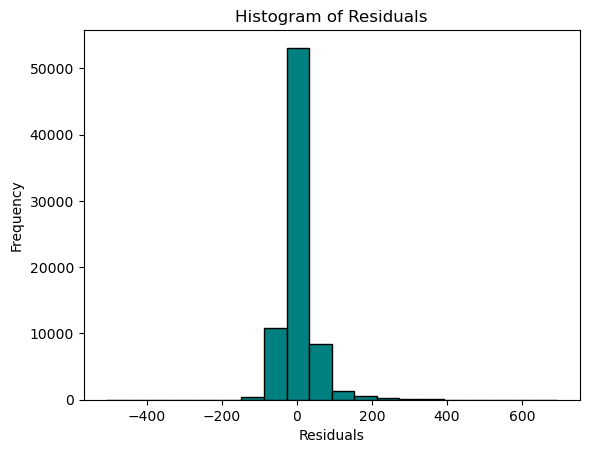

In [32]:
plt.hist((y_test - rf_y_pred), bins=20, edgecolor='black', color='teal')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.savefig("../images/residuals_histogram.png", bbox_inches="tight")

---

## 3.4 Conclusion

Optimal model (Random Forest):

- Training Score: 0.9793
- Testing Score: 0.9754
- RMSE Score: 42.75

The training and testing scores for the Random Forest model indicate that the model performs well on the specific dataset used for training and testing.